In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

data = pd.read_csv("dataset.csv")
data.sample(5)


colors   dress_type skin_tone  is_match
4181  black       Skirts   #D2996C         1
1255  black  Track Pants   #D2996C         1
2859  black       Shirts   #8E4B32         0
3063  white         Tops   #EBCCAB         1
2991  black       Shirts   #8E4B32         0

In [3]:
print('data \n',data['is_match'].value_counts())

data 
 1    5038
0    4962
Name: is_match, dtype: int64


In [5]:
!pip install imbalanced-learn


In [6]:
from imblearn.over_sampling import SMOTE

X = data.drop('is_match', axis=1)
y = data['is_match']
X
# Create an instance of the SMOTE class
smote = SMOTE()

# Resample the dataset
X, y = smote.fit_resample(X, y)


ValueError: could not convert string to float: 'brown'

In [15]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape)
print(X_test.shape)

(1208, 3)
(302, 3)


In [16]:
def model_executor_and_acuracy(model):
    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = model.predict(X_test)

    print(f"<<<<====== {model} ====>>>>")
    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)
    print("Accuracy:", accuracy)

    # Create a confusion matrix to visualize the performance of the model
    cm = confusion_matrix(y_test, y_pred)
    cm_display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = [False, True])

    cm_display.plot()
    plt.show()

In [17]:
# Create a logistic regression model
logreg = LogisticRegression()
# Create a KNeighborsClassifier model
knc = KNeighborsClassifier(n_neighbors=2)
# Create a DecisionTreeClassifier model
dtc = DecisionTreeClassifier()
models = [logreg, dtc, knc]

<<<<====== LogisticRegression() ====>>>>
Accuracy: 0.8211920529801324


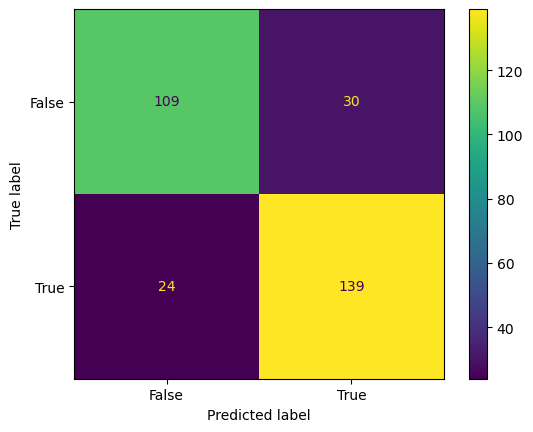

<<<<====== DecisionTreeClassifier() ====>>>>
Accuracy: 1.0


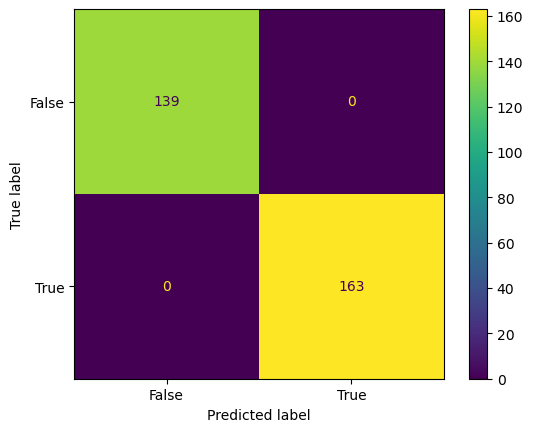

<<<<====== KNeighborsClassifier(n_neighbors=2) ====>>>>
Accuracy: 0.9867549668874173


C:\Users\Malith\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


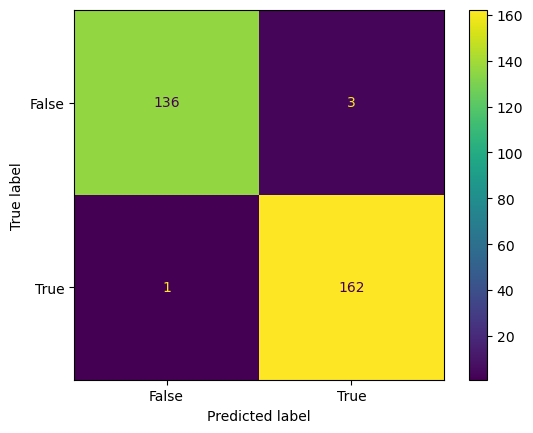

In [21]:
# calling method - model_executor_and_acuracy
for model in models:
    model_executor_and_acuracy(model)

In [22]:
select_model = DecisionTreeClassifier()
select_model.fit(X, y)


DecisionTreeClassifier()

# Save model

In [24]:
import joblib

# save model
joblib.dump(select_model, 'DecisionTreeClassifierModel.pickle')

['DecisionTreeClassifierModel.pickle']

# Load model

In [38]:
# Load model
load_mode = joblib.load('DecisionTreeClassifierModel.pickle')
X

quize  test  exam
0        17    27    22
1        72    82    77
2        97    18    13
3         8    42    37
4        32    25    20
...     ...   ...   ...
1505     89    75    43
1506     84    44    43
1507     59    65    56
1508     83    62    98
1509     70    90    95

[1510 rows x 3 columns]

# Load Csv File

In [44]:
s2 = [[56],[65], [43]]
df = pd.DataFrame({'quize': s2[0], 'test': s2[1], 'exam': s2[2]})
print(df)

sample = df.iloc[:,:].values 

predict_res = load_mode.predict(sample)
print('predic', predict_res)

   quize  test  exam
0     56    65    43
predic [1]


C:\Users\Malith\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [3]:
import pandas as pd
result_list = [
    {"quize": 45, "test": 85, "exam": 87},{"quize": 77, "test": 33, "exam": 55},{"quize": 88, "test": 45, "exam": 89}
]
# Example DataFrame
df = pd.DataFrame(result_list)

# Convert DataFrame to list of dictionaries
grades_list = df.to_dict(orient="records")

df


quize  test  exam
0     45    85    87
1     77    33    55
2     88    45    89